# QUALITY PREDICTION IN A MINING PROCESS

# Importing the Libraries

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [2]:
#Importing the Dataset
df=pd.read_csv('MiningProcess_Flotation.csv', decimal=',',parse_dates=["date"],infer_datetime_format=True, sep=',')
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [3]:
df.shape

(10000, 24)

In [4]:
df = df.dropna()
df.shape

(10000, 24)

# **There is no null values in the data set**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          10000 non-null  datetime64[ns]
 1   % Iron Feed                   10000 non-null  float64       
 2   % Silica Feed                 10000 non-null  float64       
 3   Starch Flow                   10000 non-null  float64       
 4   Amina Flow                    10000 non-null  float64       
 5   Ore Pulp Flow                 10000 non-null  float64       
 6   Ore Pulp pH                   10000 non-null  float64       
 7   Ore Pulp Density              10000 non-null  float64       
 8   Flotation Column 01 Air Flow  10000 non-null  float64       
 9   Flotation Column 02 Air Flow  10000 non-null  float64       
 10  Flotation Column 03 Air Flow  10000 non-null  float64       
 11  Flotation Column 04 Air Flow 

# Observations :
       All Variables are in float64 type

In [6]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,57.856112,12.806148,3455.493258,503.862121,399.811736,9.970999,1.741488,250.062145,250.082778,250.052360,...,250.053197,517.116743,518.598245,517.424186,494.484680,513.676650,521.093523,513.231428,65.763122,2.510592
std,2.206352,3.931974,1125.980028,91.495843,6.224821,0.250178,0.044562,2.004042,4.489379,1.681614,...,1.614940,52.385866,113.668490,53.977752,100.340552,66.033471,57.673370,63.904699,1.205487,1.225186
min,54.950000,8.250000,12.207000,247.070000,376.274000,9.286950,1.519830,227.197000,178.374000,210.938000,...,244.380000,376.968000,210.986000,336.734000,162.439000,188.943000,194.453000,206.107000,62.830000,1.090000
25%,55.200000,8.980000,3007.322500,441.650000,396.299000,9.819820,1.740000,248.577000,248.126000,249.170000,...,249.082000,456.445000,452.901000,457.404750,448.295750,458.417750,465.130000,462.641750,65.120000,1.490000
50%,58.840000,11.460000,3405.420000,541.626000,399.902000,9.974000,1.750000,249.829000,250.102500,250.005000,...,250.005000,542.358000,542.771500,542.477500,533.807500,535.635000,537.478000,527.480000,66.160000,2.120000
75%,59.890000,17.160000,3871.287500,565.628250,403.418000,10.153725,1.763240,251.609000,252.070000,250.950000,...,250.840000,553.690000,554.961250,553.688000,555.487000,555.961000,559.759000,557.973000,66.680000,3.420000
max,60.660000,17.400000,6250.000000,650.513000,418.623000,10.472200,1.790000,261.255000,325.525000,286.677000,...,257.739000,859.914000,828.766000,869.058000,680.023000,675.474000,698.390000,659.378000,67.600000,5.360000


# Visualize data distribution to identify whether outliers exist

In [7]:
df=df.set_index('date')

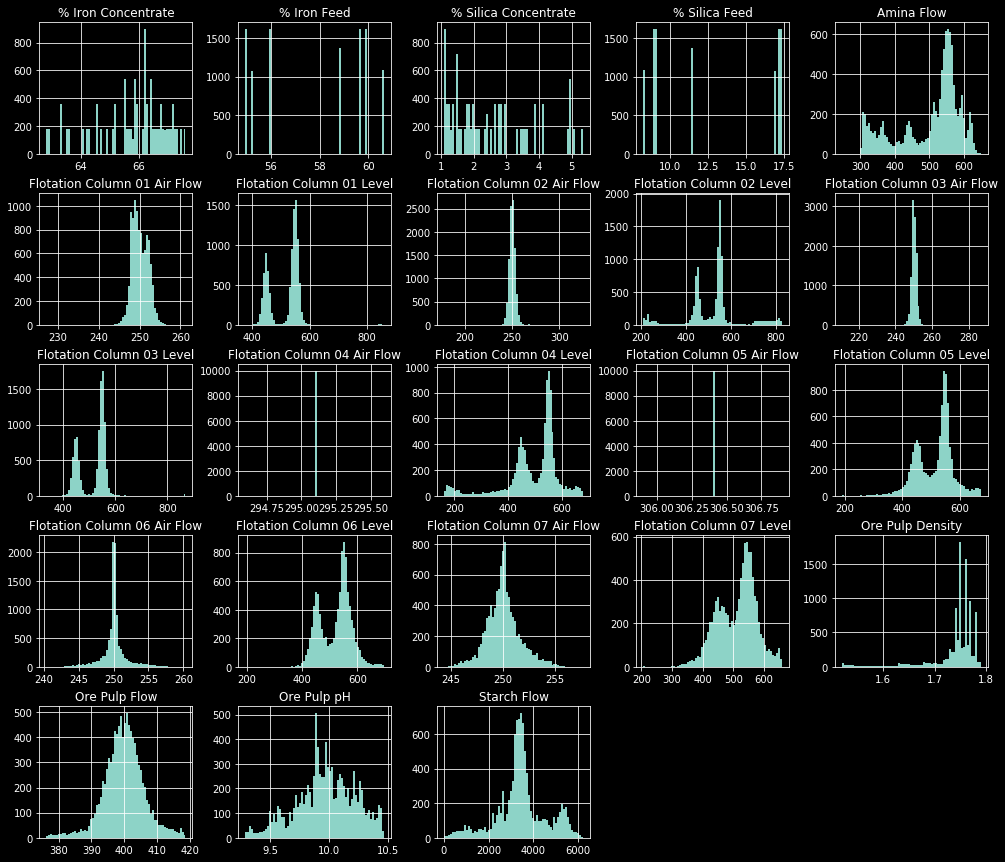

Text(0.5, 0.98, 'figure title')

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])
df.hist(bins = 70, figsize = (17,15))
plt.show()
plt.suptitle('figure title', color='w')

# Remove Outliers using IQRscore method, removing datapoints 


In [9]:
#Find outliers using IQR Score(i.e. IQR=Q3-Q1) 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

% Iron Feed                       4.690000
% Silica Feed                     8.180000
Starch Flow                     863.965000
Amina Flow                      123.978250
Ore Pulp Flow                     7.119000
Ore Pulp pH                       0.333905
Ore Pulp Density                  0.023240
Flotation Column 01 Air Flow      3.032000
Flotation Column 02 Air Flow      3.944000
Flotation Column 03 Air Flow      1.780000
Flotation Column 04 Air Flow      0.000000
Flotation Column 05 Air Flow      0.000000
Flotation Column 06 Air Flow      0.780000
Flotation Column 07 Air Flow      1.758000
Flotation Column 01 Level        97.245000
Flotation Column 02 Level       102.060250
Flotation Column 03 Level        96.283250
Flotation Column 04 Level       107.191250
Flotation Column 05 Level        97.543250
Flotation Column 06 Level        94.629000
Flotation Column 07 Level        95.331250
% Iron Concentrate                1.560000
% Silica Concentrate              1.930000
dtype: floa

In [10]:
df = df[~((df < (Q1 - 3 * IQR)) |(df > (Q3 + 3 * IQR))).any(axis=1)]
df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-12 08:00:00,58.82,11.46,3706.84,507.751,396.621,9.69868,1.74679,249.016,250.115,249.258,...,251.960,454.193,445.249,438.008,590.666,455.387,459.362,456.636,65.78,2.43
2017-03-12 08:00:00,58.82,11.46,3716.80,513.611,398.877,9.69785,1.74714,248.994,248.357,249.236,...,249.148,453.643,440.379,450.901,570.315,446.519,460.986,472.031,65.78,2.43
2017-03-12 08:00:00,58.82,11.46,3756.45,512.939,405.059,9.69703,1.74748,250.422,252.708,249.785,...,248.555,435.975,453.012,469.676,535.782,433.517,465.690,491.835,65.78,2.43


# Observation
1953 rows containing outliers in the dataset have been removed.

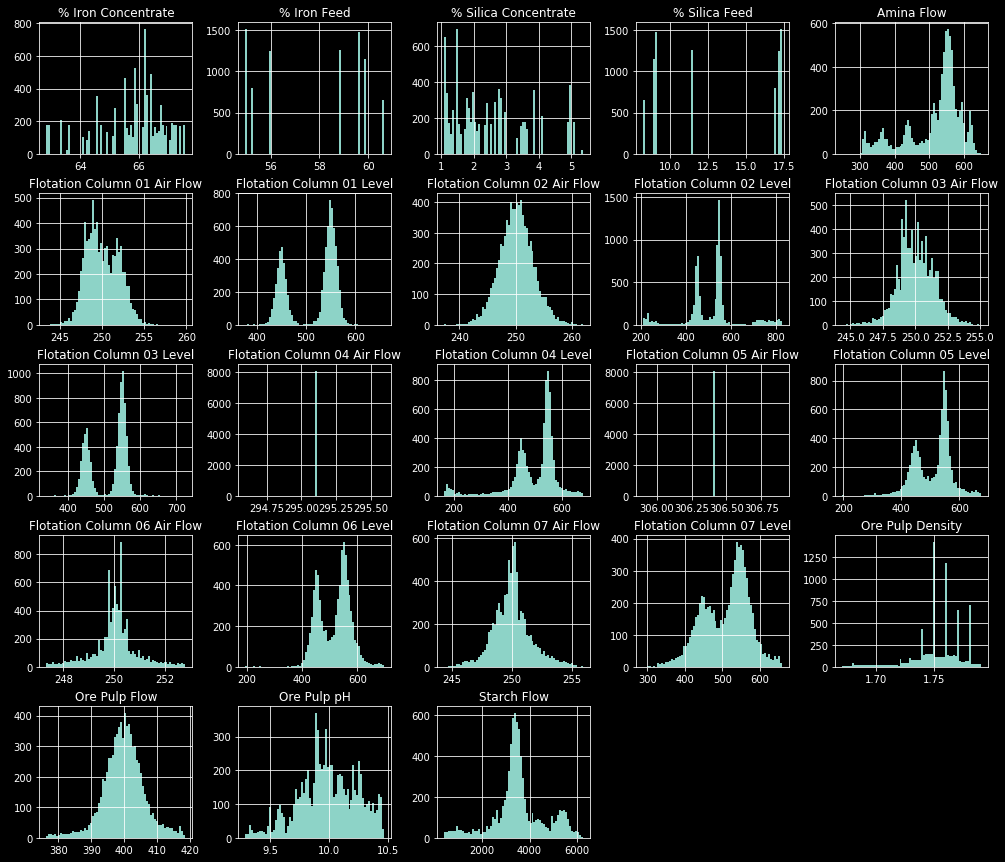

Text(0.5, 0.98, 'figure title')

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])
df.hist(bins = 70, figsize = (17,15))
plt.show()
plt.suptitle('figure title', color='w')

In [12]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,...,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000
mean,57.757755,12.953567,3542.756552,518.666493,399.803387,9.990741,1.752264,250.074066,250.149295,250.046221,...,250.053917,513.599870,516.811409,513.865698,496.344662,511.200510,517.708354,510.250731,65.792729,2.483318
std,2.183959,3.889228,1092.338806,79.276870,6.265553,0.249276,0.021427,1.905490,3.057301,1.381243,...,1.587913,49.831221,112.336625,50.730292,93.840023,63.825252,58.363376,62.588745,1.169714,1.164197
min,54.950000,8.250000,415.723000,247.070000,376.318000,9.289710,1.670450,243.413000,237.305000,244.336000,...,244.380000,376.968000,210.986000,341.000000,162.651000,194.608333,194.453000,287.994000,62.830000,1.090000
25%,55.200000,9.090000,3125.590000,489.540250,396.240000,9.827810,1.743867,248.610000,248.159000,249.170000,...,249.097000,454.800250,451.990000,455.737500,450.390000,456.761500,461.098000,459.693000,65.160000,1.500000
50%,58.840000,11.460000,3435.890000,546.265000,399.881000,9.980855,1.753155,249.829000,250.115000,249.994000,...,250.005000,541.178000,541.487000,541.170000,535.383500,534.935500,532.392000,525.243500,66.160000,2.130000
75%,59.660000,17.160000,3979.810000,567.261000,403.389000,10.190100,1.766660,251.631000,252.070000,250.950000,...,250.818000,553.140000,554.622750,553.310000,554.445750,554.498750,559.276000,555.924250,66.520000,3.340000
max,60.660000,17.400000,6250.000000,650.513000,418.623000,10.472200,1.790000,259.893000,261.969000,255.081000,...,255.948000,658.743000,828.766000,724.885000,680.023000,675.260000,697.998000,659.378000,67.600000,5.360000


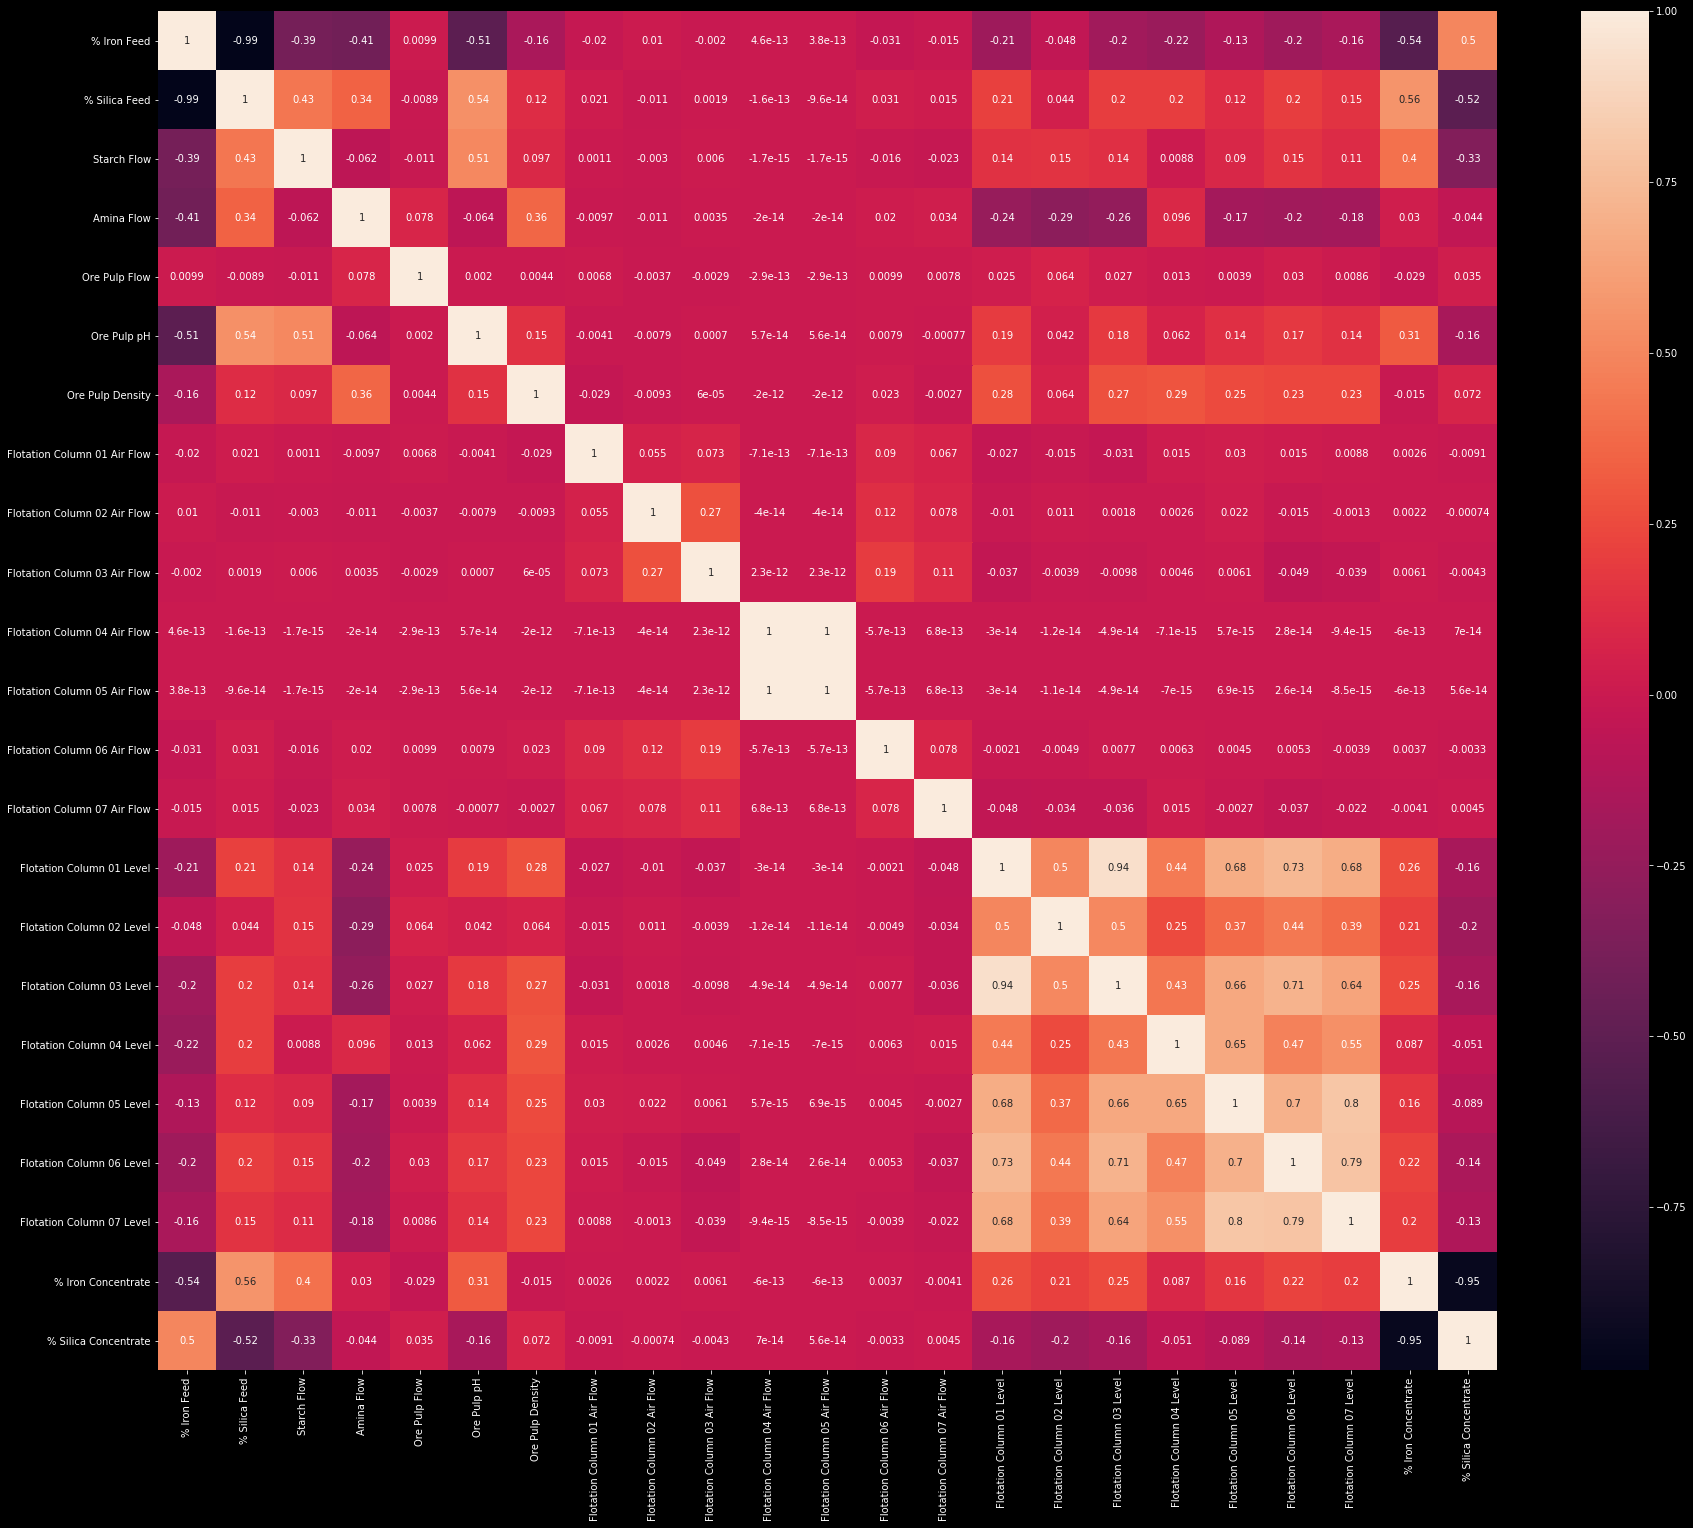

In [13]:
plt.figure(figsize=(30, 25))
p = sns.heatmap(df.corr(), annot=True)

### Lets reduce the number of variables

In [14]:
df.reset_index(inplace=True)
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8069,2017-03-12 08:00:00,58.82,11.46,3706.84,507.751,396.621,9.69868,1.74679,249.016,250.115,...,251.960,454.193,445.249,438.008,590.666,455.387,459.362,456.636,65.78,2.43
8070,2017-03-12 08:00:00,58.82,11.46,3716.80,513.611,398.877,9.69785,1.74714,248.994,248.357,...,249.148,453.643,440.379,450.901,570.315,446.519,460.986,472.031,65.78,2.43
8071,2017-03-12 08:00:00,58.82,11.46,3756.45,512.939,405.059,9.69703,1.74748,250.422,252.708,...,248.555,435.975,453.012,469.676,535.782,433.517,465.690,491.835,65.78,2.43
8072,2017-03-12 08:00:00,58.82,11.46,3796.68,512.756,397.266,9.69884,1.74783,250.686,253.499,...,251.873,445.034,441.738,470.541,510.783,427.682,445.474,493.273,65.78,2.43


In [15]:
silic_corr = df.corr()['% Silica Concentrate']
silic_corr = abs(silic_corr).sort_values()
silic_corr

Flotation Column 05 Air Flow    5.554031e-14
Flotation Column 04 Air Flow    6.992613e-14
Flotation Column 02 Air Flow    7.362117e-04
Flotation Column 06 Air Flow    3.288457e-03
Flotation Column 03 Air Flow    4.289147e-03
Flotation Column 07 Air Flow    4.501528e-03
Flotation Column 01 Air Flow    9.056721e-03
Ore Pulp Flow                   3.450755e-02
Amina Flow                      4.366357e-02
Flotation Column 04 Level       5.142203e-02
Ore Pulp Density                7.171456e-02
Flotation Column 05 Level       8.946047e-02
Flotation Column 07 Level       1.302548e-01
Flotation Column 06 Level       1.432228e-01
Flotation Column 03 Level       1.618298e-01
Ore Pulp pH                     1.642514e-01
Flotation Column 01 Level       1.649702e-01
Flotation Column 02 Level       2.005945e-01
Starch Flow                     3.288355e-01
% Iron Feed                     5.000654e-01
% Silica Feed                   5.165432e-01
% Iron Concentrate              9.455641e-01
% Silica C

In [16]:
drop_index= silic_corr.index[:14].tolist() + ['date']#+["% Iron Concentrate"]
print (drop_index)

['Flotation Column 05 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 03 Air Flow', 'Flotation Column 07 Air Flow', 'Flotation Column 01 Air Flow', 'Ore Pulp Flow', 'Amina Flow', 'Flotation Column 04 Level', 'Ore Pulp Density', 'Flotation Column 05 Level', 'Flotation Column 07 Level', 'Flotation Column 06 Level', 'date']


### Above plot shows the correaltions between the features. From the list we can find out the features which affects the % Silica Concentrate the most and discard the least important ones.

In [17]:
drop_index

['Flotation Column 05 Air Flow',
 'Flotation Column 04 Air Flow',
 'Flotation Column 02 Air Flow',
 'Flotation Column 06 Air Flow',
 'Flotation Column 03 Air Flow',
 'Flotation Column 07 Air Flow',
 'Flotation Column 01 Air Flow',
 'Ore Pulp Flow',
 'Amina Flow',
 'Flotation Column 04 Level',
 'Ore Pulp Density',
 'Flotation Column 05 Level',
 'Flotation Column 07 Level',
 'Flotation Column 06 Level',
 'date']

In [18]:
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8069,2017-03-12 08:00:00,58.82,11.46,3706.84,507.751,396.621,9.69868,1.74679,249.016,250.115,...,251.960,454.193,445.249,438.008,590.666,455.387,459.362,456.636,65.78,2.43
8070,2017-03-12 08:00:00,58.82,11.46,3716.80,513.611,398.877,9.69785,1.74714,248.994,248.357,...,249.148,453.643,440.379,450.901,570.315,446.519,460.986,472.031,65.78,2.43
8071,2017-03-12 08:00:00,58.82,11.46,3756.45,512.939,405.059,9.69703,1.74748,250.422,252.708,...,248.555,435.975,453.012,469.676,535.782,433.517,465.690,491.835,65.78,2.43
8072,2017-03-12 08:00:00,58.82,11.46,3796.68,512.756,397.266,9.69884,1.74783,250.686,253.499,...,251.873,445.034,441.738,470.541,510.783,427.682,445.474,493.273,65.78,2.43


In [19]:
#Preparing the Dataset
df = df.drop(drop_index, axis=1)
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Ore Pulp pH,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3019.53,10.0664,457.396,432.962,424.954,66.91,1.31
1,55.2,16.98,3024.41,10.0672,451.891,429.560,432.939,66.91,1.31
2,55.2,16.98,3043.46,10.0680,451.240,468.927,434.610,66.91,1.31
3,55.2,16.98,3047.36,10.0689,452.441,458.165,442.865,66.91,1.31
4,55.2,16.98,3033.69,10.0697,452.441,452.900,450.523,66.91,1.31


In [20]:
Y1 = df['% Silica Concentrate']
X1 = df.drop(['% Silica Concentrate'], axis=1)

In [21]:
X1

,% Iron Feed,% Silica Feed,Starch Flow,Ore Pulp pH,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,% Iron Concentrate
0,55.20,16.98,3019.53,10.06640,457.396,432.962,424.954,66.91
1,55.20,16.98,3024.41,10.06720,451.891,429.560,432.939,66.91
2,55.20,16.98,3043.46,10.06800,451.240,468.927,434.610,66.91
3,55.20,16.98,3047.36,10.06890,452.441,458.165,442.865,66.91
4,55.20,16.98,3033.69,10.06970,452.441,452.900,450.523,66.91
...,...,...,...,...,...,...,...,...
8069,58.82,11.46,3706.84,9.69868,454.193,445.249,438.008,65.78
8070,58.82,11.46,3716.80,9.69785,453.643,440.379,450.901,65.78
8071,58.82,11.46,3756.45,9.69703,435.975,453.012,469.676,65.78
8072,58.82,11.46,3796.68,9.69884,445.034,441.738,470.541,65.78


In [22]:
import statsmodels.api as sm
model1 = sm.OLS(Y1,X1).fit()
predictions = model1.predict(X1)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     % Silica Concentrate   R-squared (uncentered):                   0.976
Model:                              OLS   Adj. R-squared (uncentered):              0.976
Method:                   Least Squares   F-statistic:                          4.177e+04
Date:                  Tue, 19 May 2020   Prob (F-statistic):                        0.00
Time:                          14:38:21   Log-Likelihood:                         -4472.8
No. Observations:                  8074   AIC:                                      8962.
Df Residuals:                      8066   BIC:                                      9018.
Df Model:                             8                                                  
Covariance Type:              nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
% Iron Feed                   0.8125      0.006    131.502      0.000       0.800       0.825
% Silica Feed                 0.4245      0.005     91.310      0.000       0.415       0.434
Starch Flow                -7.94e-05   5.13e-06    -15.475      0.000   -8.95e-05   -6.93e-05
Ore Pulp pH                   0.8701      0.024     35.571      0.000       0.822       0.918
Flotation Column 01 Level     0.0015      0.000      5.580      0.000       0.001       0.002
Flotation Column 02 Level    -0.0004   4.99e-05     -7.291      0.000      -0.000      -0.000
Flotation Column 03 Level     0.0007      0.000      2.661      0.008       0.000       0.001
% Iron Concentrate           -0.9015      0.005   -179.482      0.000      -0.911      -0.892
==============================================================================
Omnibus:                      222.874   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.382
Skew:                          -0.386   Prob(JB):                     7.04e-55
Kurtosis:                       3.382   Cond. No.                     2.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Splitting the dataset into the Training set and Test set

In [23]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1,test_size = 0.2, random_state=1)

In [24]:
X_train

,% Iron Feed,% Silica Feed,Starch Flow,Ore Pulp pH,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,% Iron Concentrate
1002,54.95,17.40,3435.94,10.21750,547.034,555.532000,531.352,65.890
6225,59.66,9.09,3329.69,9.88262,544.481,555.701000,536.742,64.565
3908,60.66,8.25,3141.99,10.14090,532.044,546.241000,554.336,65.120
6366,59.66,9.09,3600.49,9.80547,450.865,458.138000,447.344,62.950
5830,59.66,9.09,3140.82,10.01030,454.844,442.530000,469.626,65.500
...,...,...,...,...,...,...,...,...
7935,58.82,11.46,4154.88,9.75631,430.220,430.750000,439.980,65.900
5192,59.89,8.98,3519.92,9.76139,557.994,799.470250,551.742,66.160
3980,60.66,8.25,3280.27,9.97178,535.022,542.195000,541.980,65.120
235,55.20,16.98,3657.03,10.09780,446.285,488.804000,467.790,66.970


In [25]:
y_train

1002    2.650
6225    3.865
3908    4.140
6366    4.970
5830    3.420
        ...  
7935    2.400
5192    1.990
3980    4.140
235     1.270
5157    2.980
Name: % Silica Concentrate, Length: 6459, dtype: float64

In [26]:
# define the data/predictors as the pre-set feature names  
features = X_train.iloc[:,:].values

In [27]:
features

array([[  54.95      ,   17.4       , 3435.94      , ...,  555.532     ,
         531.352     ,   65.89      ],
       [  59.66      ,    9.09      , 3329.69      , ...,  555.701     ,
         536.742     ,   64.565     ],
       [  60.66      ,    8.25      , 3141.99      , ...,  546.241     ,
         554.336     ,   65.12      ],
       ...,
       [  60.66      ,    8.25      , 3280.27      , ...,  542.195     ,
         541.98      ,   65.12      ],
       [  55.2       ,   16.98      , 3657.03      , ...,  488.804     ,
         467.79      ,   66.97      ],
       [  59.89      ,    8.98      , 3773.44      , ...,  787.31917188,
         573.        ,   64.92      ]])

In [28]:
labels = y_train.iloc[:].values

In [29]:
labels

array([2.65 , 3.865, 4.14 , ..., 4.14 , 1.27 , 2.98 ])

In [30]:
X=features
y=labels

# Multiple linear regression model

In [31]:
# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X,y) 

In [32]:
predictions = model.predict(X)

# Check model accuracy

In [33]:
#Check model accuracy
accuracy=model.score(X,y)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.9189612670868575


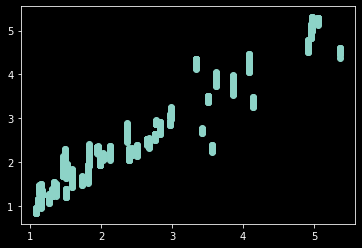

In [34]:
#Visualize the predictions
plt.scatter(y, predictions)

# Observation
The model is  linear.

# Predicting a new result

In [35]:
#Define new data instance
Xnew = [[60.95,17.40,3435.94,10.21750,547.034,555.532000,531.352,65.890]]

#Make a Prediction
ynew = model.predict(Xnew)

#Show the inputs and predicted outputs
print("New Quantities of features=%s, Percentage of Silica concentrate=%s" % (Xnew,ynew))


New Quantities of features=[[60.95, 17.4, 3435.94, 10.2175, 547.034, 555.532, 531.352, 65.89]], Percentage of Silica concentrate=[2.77534532]


# Model for evaluation for training set and testing set

In [36]:
#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [37]:
# model evaluation for training set
import numpy as np
rmse_training = (np.sqrt(mean_squared_error(y_train, y_train_prediction)))
r2_training = r2_score(y_train, y_train_prediction)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

# model evaluation for testing set
rmse_testing = (np.sqrt(mean_squared_error(y_test, y_test_prediction)))
r2_testing = r2_score(y_test, y_test_prediction)

print("The model performance for testing set")
print("--------------------------------------")
print('Root mean squared error: ', rmse_testing)
print('R2 score: ', r2_testing)

The model performance for training set
--------------------------------------
RMSE is 0.33049194079911326
R2 score is 0.9189612670868575


The model performance for testing set
--------------------------------------
Root mean squared error:  0.3182897147842659
R2 score:  0.9268025099218198


# Random Forest Regression

# Training the Random Forest Regression model


In [38]:
from sklearn.ensemble import RandomForestRegressor
import math
import sklearn.metrics as metrics
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

# Check model accuracy

In [39]:
accuracy=regressor.score(X,y)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.999985198460593


# Predicting a new result

In [40]:
y_pred = regressor.predict([[59.89,8.98,169.160114,560.608,9.52851,516.110000,598.4390,65.150]])

In [41]:
y_pred

array([3.412])

# Model for evaluation for training set and testing set

In [42]:
# Show model results of training set
y_hat = regressor.predict(X_train)
mse = metrics.mean_squared_error(y_train,y_hat)
print ("TRAINING SET")
print ("============")
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", regressor.score(X_train,y_train))
# Show model results of testing set
y_hat = regressor.predict(X_test)
mse = metrics.mean_squared_error(y_test,y_hat)
print ("TESTING SET")
print ("============")
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", regressor.score(X_test,y_test))

TRAINING SET
RMSE:                0.0044665067573449405
r2:                  0.999985198460593
TESTING SET
RMSE:                0.004868296375275742
r2:                  0.9999828760086961


# Observation
1.This Random Forest Regressor has a higher R-squared compared to Multiple linear regression model and 
  the best RMSE Score 

# Decision Tree Regression


In [43]:
#Fit Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
#Create the Decision Tree regressor object 
dtr = DecisionTreeRegressor(random_state=0)

In [44]:
#Fit the regressor object to the dataset.
dtr.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

# Predict a new result

In [45]:
#Predict a new result
y_pred1 = dtr.predict([[59.89,8.98,169.160114,560.608,9.52851,516.110000,598.4390,65.150]])

In [46]:
y_pred1

array([3.42])

# Check model accuracy

In [47]:
accuracy=dtr.score(X,y)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 1.0


# Model for evaluation for training set and testing set

In [48]:
# Show model results of training set
y_hat = dtr.predict(X_train)
mse = metrics.mean_squared_error(y_train,y_hat)
print ("TRAINING SET")
print ("============")
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", dtr.score(X_train,y_train))
# Show model results of testing set
y_hat = dtr.predict(X_test)
mse = metrics.mean_squared_error(y_test,y_hat)
print ("TESTING SET")
print ("============")
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", dtr.score(X_test,y_test))

TRAINING SET
RMSE:                5.043752173779611e-15
r2:                  1.0
TESTING SET
RMSE:                5.094732759526875e-15
r2:                  1.0


# Visualize the predictions

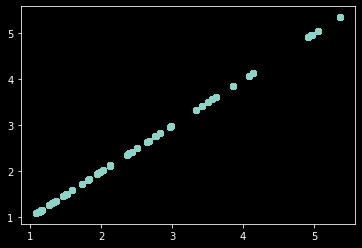

In [49]:
#Visualize the predictions
predictions = dtr.predict(X_train)
plt.scatter(y_train, predictions)

# Observation
1.The Multiple linear regression  has a best R-squared and RMSE Score.